# Assignment 1

#### Student ID: *Double click here to fill the Student ID*

#### Name: *Double click here to fill the name*

## Q1: Exploring the TensorFlow playground

http://playground.tensorflow.org/

(a) Execute the following steps first:
1. Change the dataset to exclusive OR dataset (top-right dataset under "DATA" panel). 
2. Reduce the hidden layer to only one layer and change the activation function to "ReLu". 
3. Run the model five times. Before each trial, hit the "Reset the network" button to get a new random initialization. (The "Reset the network" button is the circular reset arrow just to the left of the Play button.) 
4. Let each trial run for at least 500 epochs to ensure convergence. 

Make some comments about the role of initialization in this non-convex optimization problem. What is the minimum number of neurons required (Keeping all other parameters unchanged) to ensure that it almost always converges to global minima (where the test loss is below 0.02)? Finally, paste the convergence results below.

* Note the convergence results should include all the settings and the model. An example is available [here](https://drive.google.com/file/d/15AXYZLNMNnpZj0kI0CgPdKnyP_KqRncz/view?usp=sharing)

Ans: Initialization plays an important role in this non-convex optimization problem. The results are slightly different every time we reset the network due to the random initialization. In my case, I have to use four neurons in the hidden layer to ensure that it always converges to the global minimum. 

The results are below:

<p align="center">
<img src="https://drive.google.com/uc?id=11qbuHo_iIZ_xmO-9q2b2307MwTa-nxQO" alt="drawing" width="600"/>
</p>

<p align="center">
<img src="https://drive.google.com/uc?id=16tmJN-b1tM5-yMf9GgQaxdkgKrH2sFjq" alt="drawing" width="600"/>
</p>

<p align="center">
<img src="https://drive.google.com/uc?id=1KMN0kqdHtR5K2len6GaNpDkKFDt-FEyC" alt="drawing" width="600"/>
</p>

<p align="center">
<img src="https://drive.google.com/uc?id=1VdiBiJEFx7axgoTgLknKPMHHiBT-vP6i" alt="drawing" width="600"/>
</p>

<p align="center">
<img src="https://drive.google.com/uc?id=1eUxPED0_AF6nSAzvNgZw8jrXJTsq63EN" alt="drawing" width="600"/>
</p>

(b) Execute the following steps first
1. Change the dataset to be the spiral (bottom-right dataset under "DATA" panel). 
2. Increase the noise level to 50 and leave the training and test set ratio unchanged. 
3. Train the best model you can, using just `X1` and `X2` as input features. Feel free to add or remove layers and neurons. You can also change learning settings like learning rate, regularization rate, activations and batch size. Try to get the test loss below 0.15. 

How many parameters do you have in your models? Describe the model architecture and the training strategy you use. Finally, paste the convergence results below. 

* You may need to train the model for enough epochs here and use learning rate scheduling manually

**Ans:** My architecture uses three hidden layers where the number of neurons is 8,6 and 4, respectively. To avoid overfitting, I also add L2 regularization with a regularization rate set to 0.001. I train the model for roughly 1000 epochs with a learning rate equal to 0.1, followed by another 1000 epochs with a learning rate of 0.1.

The number of parameters in this model is $2*8+8*6+6*4+4*1=92$ (Ignoring the bias term here.)

The results are below:

<p align="center">
<img src="https://drive.google.com/uc?id=1Kz-oIZ0Nr2tgDVzpa1Rk_ph7vumMEvDE" alt="drawing" width="600"/>
</p>

(c) Use the same dataset as described above with noise level set to 50. 
This time, feel free to add additional features or other transformations like `sin(X1)` and `sin(X2)`. Again, try to get the loss below 0.15.

Compare the results with (b) and describe your observation. Describe the model architecture and the training strategy you use. Finally, paste the convergence results below. 

**Ans:** Here my architecture is the same as (b), except that I add all the transformations available. To avoid overfitting, I also add L2 regularization with a regularization rate set to 0.001. I train the model for roughly 500 epochs with a learning rate equal to 0.1.

The results show that we can learn faster by feature engineering!

The results are below:

<p align="center">
<img src="https://drive.google.com/uc?id=1Cg452lEDi09ZtqqLY18Z8eM9-tacqBYa" alt="drawing" width="600"/>
</p>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [ ]:
import tensorflow as tf
from tensorflow import keras #use tf.keras not keras.io (multibackend keras)

## Q2 Takling MNIST with DNN

In this question, we will explore the behavior of the vanishing gradient problem (which we have tried to solve using feature engineering in Q1) and try to solve it. The dataset we use is the famous MNIST dataset which contains ten different classes of handwritten digits. The MNIST database contains 60,000 training images and 10,000 testing images. In addition, each grayscale image is fit into a 28x28 pixel bounding box.

http://yann.lecun.com/exdb/mnist/

(a) Load the MNIST dataset (you may refer to `keras.datasets.mnist.load_data()`), and split it into a training set (48,000 images), a validation set (12,000 images) and a test set (10,000 images). Make sure to standardize the dataset first.

In [ ]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_valid, X_train = X_train_full[:12000], X_train_full[12000:]
y_valid, y_train = y_train_full[:12000], y_train_full[12000:]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_valid_scaled = scaler.transform(X_valid.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_test_scaled = scaler.transform(X_test.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_scaled.shape, X_valid_scaled.shape, X_test_scaled.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [ ]:
import pandas as pd
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.show()

(b) Build a sequential model with 30 hidden dense layers (60 neurons each using ReLU as the activation function) plus an output layer (10 neurons using softmax as the activation function). Train it with SGD optimizer with learning rate 0.001 and momentum 0.9 for 10 epochs on MNIST dataset.  

Try to manually calculate how many steps are in one epoch and compare it with the one reported by the program. Finally, plot the learning curves (loss vs epochs) and report the accuracy you get on the test set.

**Ans:** Since we have 48000 images in the training set and the default batch size is 32. The steps = 48000/32 = 1500.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(30):
    model.add(keras.layers.Dense(60, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3, momentum=0.9),
              metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))

2022-05-10 09:14:36.957879: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 09:14:37.071252: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 09:14:37.072307: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 09:14:37.074130: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 2.3017 - accuracy: 0.1116 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3004 - val_accuracy: 0.1126
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 2.2738 - accuracy: 0.1410 - val_loss: 2.1576 - val_accuracy: 0.1988
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.8861 - accuracy: 0.2180 - val_loss: 1.6536 - val_accuracy: 0.2718
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.2791 - accuracy: 0.4450 - val_loss: 1.0673 - val_accuracy: 0.5418
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0124 - accuracy: 0.6338 - val_loss: 0.8881 - val_accuracy

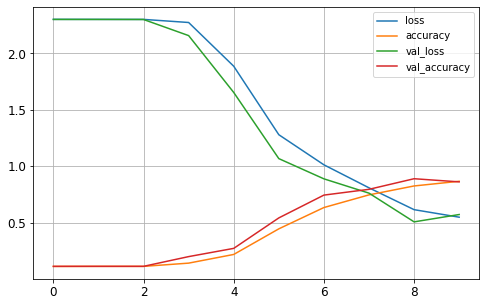

In [ ]:
plot_learning_curves(history)

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5826 - accuracy: 0.8595


[0.582584023475647, 0.859499990940094]

(c) Update the model in (b) to add a BatchNormalization (BN) layer after every hidden layer's activation functions. 

How do the training time and the performance compare with (b)? Try to manually calculate how many non-trainable parameters are in your model and compare it with the one reported by the program. Finally, try moving the BN layers before the hidden layers' activation functions and compare the performance with BN layers after the activation function.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(30):
    model.add(keras.layers.Dense(60, activation="relu"))
    model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3, momentum=0.9),
              metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1500/1500 [==============================] - 30s 16ms/step - loss: 1.8243 - accuracy: 0.3700 - val_loss: 1.4477 - val_accuracy: 0.4956
Epoch 2/10
1500/1500 [==============================] - 26s 17ms/step - loss: 1.4880 - accuracy: 0.4873 - val_loss: 1.2203 - val_accuracy: 0.5816
Epoch 3/10
1500/1500 [==============================] - 25s 17ms/step - loss: 1.3510 - accuracy: 0.5434 - val_loss: 1.0750 - val_accuracy: 0.6322
Epoch 4/10
1500/1500 [==============================] - 26s 17ms/step - loss: 1.2284 - accuracy: 0.5921 - val_loss: 0.9383 - val_accuracy: 0.6948
Epoch 5/10
1500/1500 [==============================] - 25s 16ms/step - loss: 1.1244 - accuracy: 0.6351 - val_loss: 0.8261 - val_accuracy: 0.7445
Epoch 6/10
1500/1500 [==============================] - 25s 17ms/step - loss: 1.0349 - accuracy: 0.6689 - val_loss: 0.7418 - val_accuracy: 0.7736
Epoch 7/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.9643 - accuracy: 0.6966 - val_loss: 0.7214 -

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 60)                47100     
_________________________________________________________________
batch_normalization (BatchNo (None, 60)                240       
_________________________________________________________________
dense_32 (Dense)             (None, 60)                3660      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60)                240       
_________________________________________________________________
dense_33 (Dense)             (None, 60)                3660      
_________________________________________________________________
batch_normalization_2 (Batch (None, 60)               

**Ans:**　There are two non-trainable parameters for each input in each BN layer, therfore, the total number of non-trainable parameters are $2*60*30=3600$

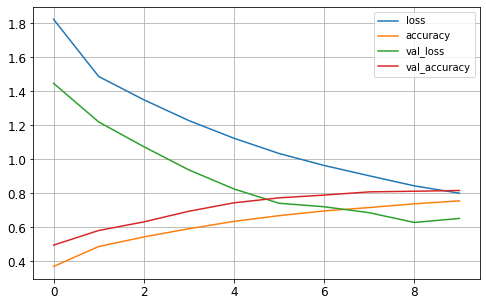

In [ ]:
plot_learning_curves(history)

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.6464 - accuracy: 0.8200


[0.646442711353302, 0.8199999928474426]

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(30):
    model.add(keras.layers.Dense(60))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3, momentum=0.9),
              metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1500/1500 [==============================] - 31s 17ms/step - loss: 1.8897 - accuracy: 0.3048 - val_loss: 1.4655 - val_accuracy: 0.4442
Epoch 2/10
1500/1500 [==============================] - 25s 17ms/step - loss: 1.4331 - accuracy: 0.4685 - val_loss: 1.1734 - val_accuracy: 0.5341
Epoch 3/10
1500/1500 [==============================] - 25s 17ms/step - loss: 1.1735 - accuracy: 0.5882 - val_loss: 0.8748 - val_accuracy: 0.7057
Epoch 4/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.9716 - accuracy: 0.6833 - val_loss: 0.6681 - val_accuracy: 0.7932
Epoch 5/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.8358 - accuracy: 0.7393 - val_loss: 0.5913 - val_accuracy: 0.8203
Epoch 6/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.7498 - accuracy: 0.7728 - val_loss: 0.5808 - val_accuracy: 0.8055
Epoch 7/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.6683 - accuracy: 0.8029 - val_loss: 0.4532 -

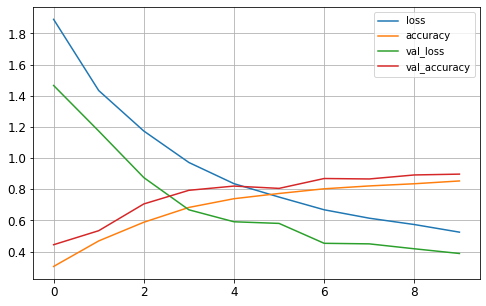

In [ ]:
plot_learning_curves(history)

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.3835 - accuracy: 0.8975


[0.3835270404815674, 0.8974999785423279]

**Ans:** The training time is slightly increased due to the addition of the BN layer. However, the training process is more smooth. In addition, moving the hidden layer before the activation function increases accuracy.

## Q3: High Accuracy CNN for CIFAR-10

When facing problems related to images like Q2, we can consider using CNN instead of DNN. The CIFAR-10 dataset is one of the most widely used datasets for machine learning research. It consists of 60000 32x32 color images in 10 classes, with 6000 images per class. In this problem, we will try to build our own CNN from scratch and achieve the highest possible accuracy on CIFAR-10. 

https://www.cs.toronto.edu/~kriz/cifar.html

(a) Load the CIFAR10 dataset (you may refer to `keras.datasets.cifar10.load_data()`), and split it into a training set (40,000 images), a validation set (10,000 images) and a test set (10,000 images). Make sure the pixel values range from 0 to 1.

In [ ]:
from sklearn.model_selection import train_test_split

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train.shape, X_valid.shape, X_train_full.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (50000, 32, 32, 3))

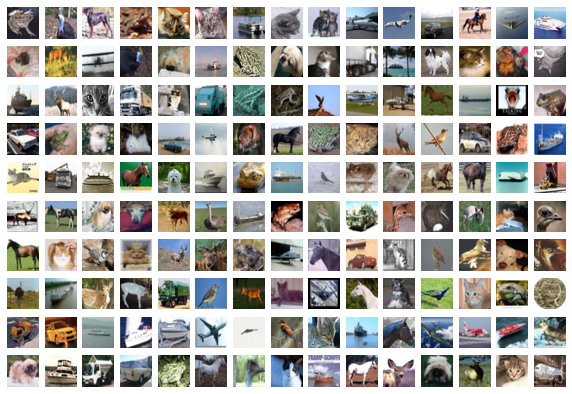

In [ ]:
plt.figure(figsize=(10, 7))
n_rows, n_cols = 10, 15
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        plt.subplot(n_rows, n_cols, i + 1)
        plt.axis("off")
        plt.imshow(X_train[i])

In [ ]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

for i in range(n_cols):
    print(classes[y_train[i][0]], end=" ")

frog bird dog frog cat cat ship cat cat airplane airplane automobile horse airplane ship 

(b) Build a Convolutional Neural Network using the following architecture: 

|        | Type                | Maps    | Activation |
|--------|---------------------|---------|------------|
| Output | Fully connected     | 10      | Softmax    |
| S10    | Max Pooling         |         |            |
| B9     | Batch normalization |         |            |
| C8     | Convolution         | 64      | ReLu       |
| B7     | Batch normalization |         |            |
| C6     | Convolution         | 64      | ReLu       |
| S5     | Max Pooling         |         |            |
| B4     | Batch normalization |         |            |
| C3     | Convolution         | 32      | ReLu       |
| B2     | Batch normalization |         |            |
| C1     | Convolution         | 32      | ReLu       |
| In     | Input               | RGB (3) |            |

Train the model for 20 epochs with NAdam optimizer (Adam with Nesterov momentum). 

Try to manually calculate the number of parameters in your model's architecture and compare it with the one reported by `summary()`. Finally, plot the learning curves and report the accuracy on the test set.

**Ans:** The number of parameters is:

* C1=$32*(3*3*3+1)=896$
* B2=$32*4=128$
* C3=$32*(3*3*32+1)=9248$
* B4=$32*4=128$
* S5=$0$
* C6=$64*(3*3*32+1)=18496$
* B7=$64*4=256$
* C8=$64*(3*3*64+1)=36928$
* B9=$64*4=256$
* S10=$0$
* Output=$10*(8*8*64+1)=40970$

$896+128+9248+128+0+18496+256+36928+256+0+40970=107306$

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


2022-05-10 09:26:05.546311: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1250/1250 [==============================] - 19s 9ms/step - loss: 1.4501 - accuracy: 0.5376 - val_loss: 1.2218 - val_accuracy: 0.5947
Epoch 2/20
1250/1250 [==============================] - 11s 8ms/step - loss: 0.9286 - accuracy: 0.6860 - val_loss: 1.0279 - val_accuracy: 0.6513
Epoch 3/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7463 - accuracy: 0.7447 - val_loss: 1.1634 - val_accuracy: 0.6274
Epoch 4/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6361 - accuracy: 0.7816 - val_loss: 0.8200 - val_accuracy: 0.7226
Epoch 5/20
1250/1250 [==============================] - 11s 8ms/step - loss: 0.5427 - accuracy: 0.8107 - val_loss: 0.8487 - val_accuracy: 0.7282
Epoch 6/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.4659 - accuracy: 0.8371 - val_loss: 0.8332 - val_accuracy: 0.7428
Epoch 7/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3962 - accuracy: 0.8616 - val_loss: 0.8337 - val_accuracy: 0.7

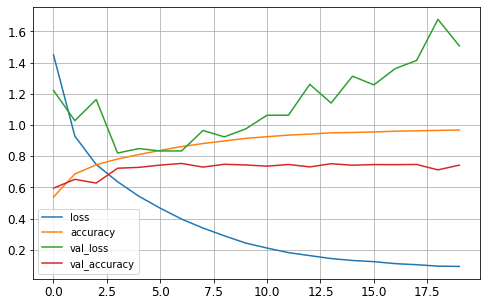

In [ ]:
plot_learning_curves(history)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4856 - accuracy: 0.7427


[1.4855797290802002, 0.7426999807357788]

(c) Looking at the learning curves, you can see that the model is overfitting. Adding data augmentation layer for the model in (a) as follows.

* Applies random horizontal flipping 
* Rotates the input images by a random value in the range `[–18 degrees, +18 degrees]`)
* Zooms in or out of the image by a random factor in the range `[-15%, +15%]`
* Randomly choose a location to crop images down to a target size `[30, 30]`
* Randomly adjust the contrast of images so that the resulting images are `[0.9, 1.1]` brighter or darker than the original one.

Fit your model for enough epochs (60, for instance) and compare its performance and learning curves with the previous model in (b). Finally, report the accuracy on the test set.


In [ ]:
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.05),
        keras.layers.RandomZoom(0.15),
        keras.layers.RandomCrop(30,30),
        keras.layers.RandomContrast(0.1)
    ]
)

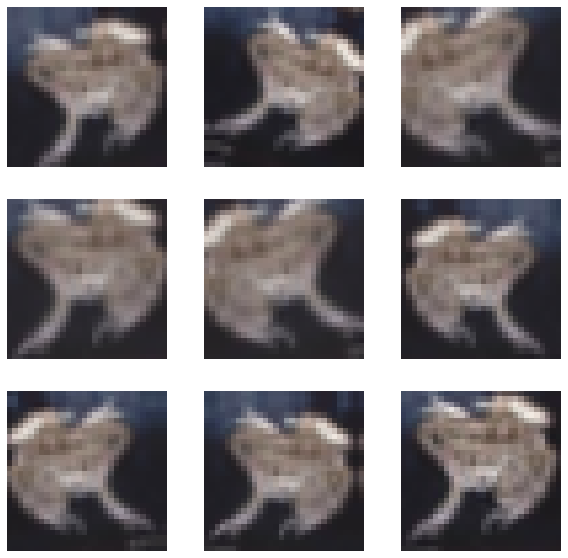

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
      # During inference time, the output will be identical to input. 
      # Call the layer with training=True to flip the input.
        augmented_images = data_augmentation(X_train[:3], training=True)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy())
        plt.axis("off")

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 30, 30, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0     

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=60,
                    validation_data=(X_valid, y_valid))

Epoch 1/60
1250/1250 [==============================] - 16s 11ms/step - loss: 1.4766 - accuracy: 0.4890 - val_loss: 1.1156 - val_accuracy: 0.6065
Epoch 2/60
1250/1250 [==============================] - 13s 10ms/step - loss: 1.0831 - accuracy: 0.6200 - val_loss: 1.0705 - val_accuracy: 0.6360
Epoch 3/60
1250/1250 [==============================] - 13s 11ms/step - loss: 0.9629 - accuracy: 0.6656 - val_loss: 0.8860 - val_accuracy: 0.7035
Epoch 4/60
1250/1250 [==============================] - 14s 11ms/step - loss: 0.8859 - accuracy: 0.6953 - val_loss: 0.8820 - val_accuracy: 0.7035
Epoch 5/60
1250/1250 [==============================] - 13s 11ms/step - loss: 0.8290 - accuracy: 0.7119 - val_loss: 0.8590 - val_accuracy: 0.7073
Epoch 6/60
1250/1250 [==============================] - 14s 11ms/step - loss: 0.7841 - accuracy: 0.7261 - val_loss: 0.8034 - val_accuracy: 0.7272
Epoch 7/60
1250/1250 [==============================] - 13s 10ms/step - loss: 0.7455 - accuracy: 0.7422 - val_loss: 0.7107 -

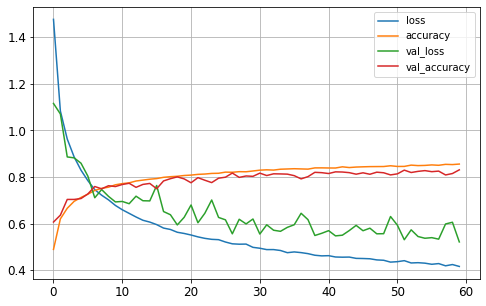

In [ ]:
plot_learning_curves(history)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5387 - accuracy: 0.8257


[0.5386573076248169, 0.8256999850273132]

**Ans:**　By inspecting the learning curve, we can perceive that the data augmentation can avoid the problem of overfitting.

(d) Replace all the convolution layers in (b) with depthwise separable convolution layers (except the first convolution layer).  

Try to manually calculate the number of parameters in your model's architecture and compare it with the one reported by `summary()`. Fit your model and compare its performance with the previous model in (c). Finally, plot the learning curves and report the accuracy on the test set.

**Ans:** The number for parameters is:

* C1=$32*(3*3*3+1)=896$
* B2=$32*4=128$
* D3=$32*(3*3*1)+32*(1*1*32+1)=1344$
* B4=$32*4=128$
* S5=$0$
* D6=$32*(3*3*1)+64*(1*1*32+1)=2400$
* B7=$64*4=256$
* D8=$64*(3*3*1)+64*(1*1*64+1)=4736$
* B9=$64*4=256$
* S10=$0$
* Output=$10*(8*8*64+1)=40970$

$896+128+1344+128+0+2400+256+4736+256+0+40970=51114$

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

inputs = keras.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.SeparableConv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.SeparableConv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.SeparableConv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
separable_conv2d (SeparableC (None, 32, 32, 32)        1344      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 16, 16, 64)        2400  

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1250/1250 [==============================] - 13s 9ms/step - loss: 1.4901 - accuracy: 0.5205 - val_loss: 1.2689 - val_accuracy: 0.5838
Epoch 2/20
1250/1250 [==============================] - 12s 9ms/step - loss: 0.9932 - accuracy: 0.6621 - val_loss: 1.0162 - val_accuracy: 0.6573
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8404 - accuracy: 0.7127 - val_loss: 0.9604 - val_accuracy: 0.6744
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7504 - accuracy: 0.7387 - val_loss: 0.9497 - val_accuracy: 0.6818
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.6790 - accuracy: 0.7633 - val_loss: 0.9123 - val_accuracy: 0.6976
Epoch 6/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.6291 - accuracy: 0.7817 - val_loss: 0.8526 - val_accuracy: 0.7221
Epoch 7/20
1250/1250 [==============================] - 12s 9ms/step - loss: 0.5769 - accuracy: 0.7998 - val_loss: 0.8523 - val_ac

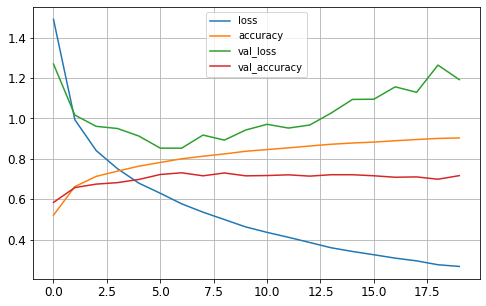

In [ ]:
plot_learning_curves(history)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2346 - accuracy: 0.7132


[1.2346140146255493, 0.7131999731063843]

**Ans:** The performance is slightly decreased. However, the model complexity is also decreased.